In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
#using tensorflow version
print("Tensorflow version",tf.__version__)

Tensorflow version 2.5.0


In [ ]:
#model
model=tf.keras.applications.vgg16.VGG16(include_top=False,weights="imagenet",input_shape=(96,96,3))
 #inputshape-rows,columns,channels
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [ ]:
#get layer output/writing function to get submodels
def get_submodels(layer_name):
  return tf.keras.models.Model(model.input,model.get_layer(layer_name).output)

get_submodels('block2_conv2').summary()


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
Total params: 260,160
Trainable params: 260,160
Non-trainable params: 0
____________________________________________________

In [ ]:
#image visulaization
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5,maxval=0.5)

def plot_image(image,title='random_image'):
  image=image-tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


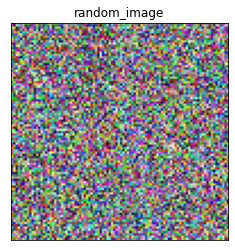

In [ ]:
image=create_image()
plot_image(image)

In [ ]:
def visualize_filter(layer_name,f_index=None,iters=50,lr=20):
  submodel=get_submodels(layer_name)
  no_filters=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0, no_filters-1)

  assert no_filters > f_index,'f_index is out of bound'

  print(f'Maximizing image for layer {layer_name} and filter {f_index}')

  image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)


  for i in range(0, iters):
    with tf.GradientTape() as tape:
            tape.watch(image)
            output = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
            loss = tf.math.reduce_mean(output)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * lr

    plot_image(image, f'{layer_name} ({f_index})')

In [ ]:
#visualization
print([layer.name for layer in model.layers if'conv'in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Maximizing image for layer block1_conv2 and filter 8


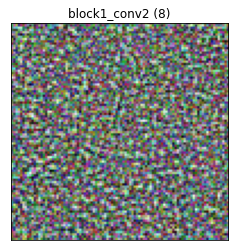

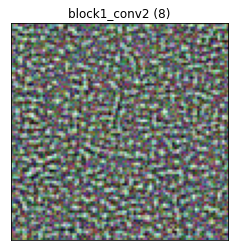

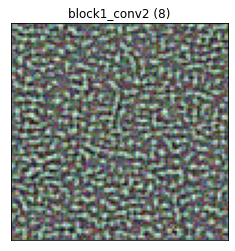

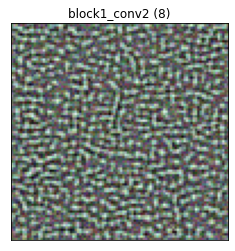

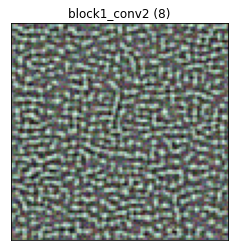

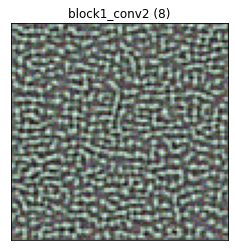

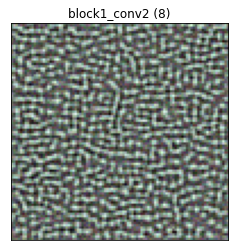

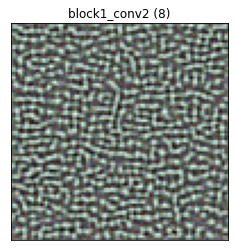

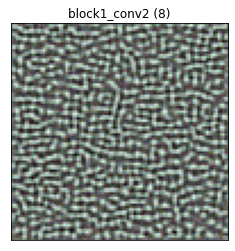

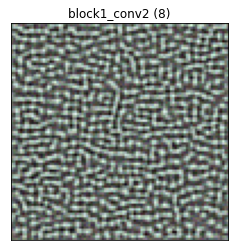

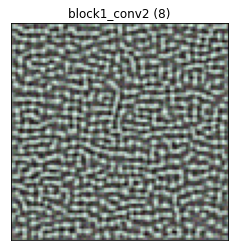

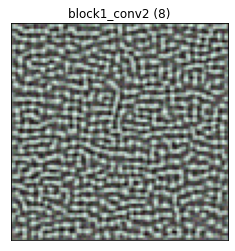

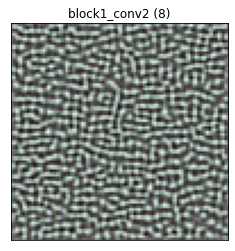

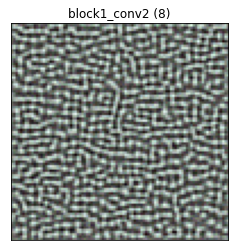

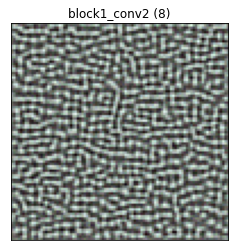

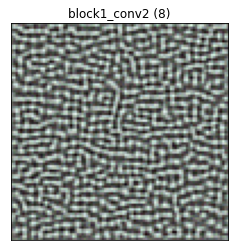

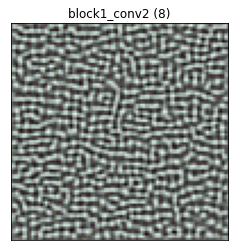

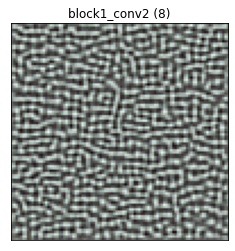

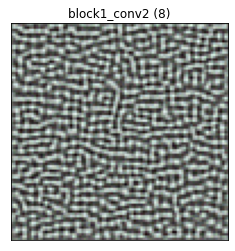

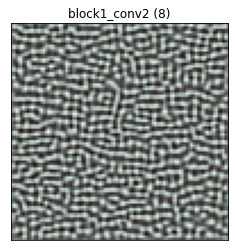

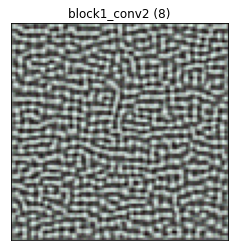

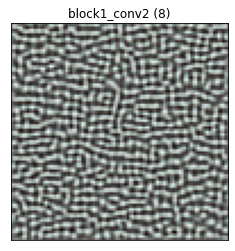

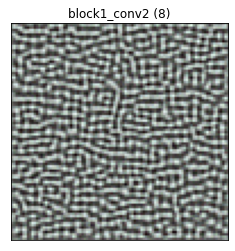

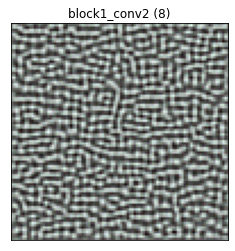

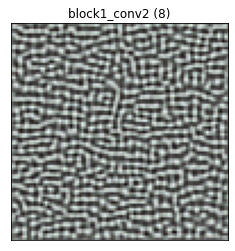

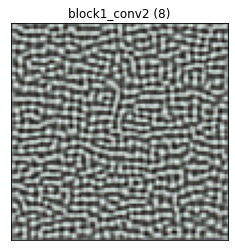

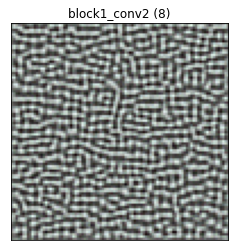

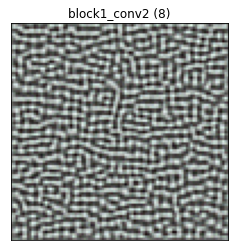

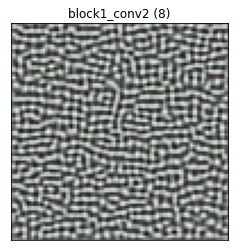

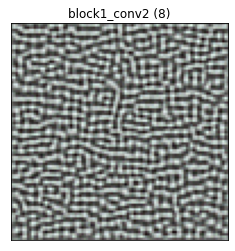

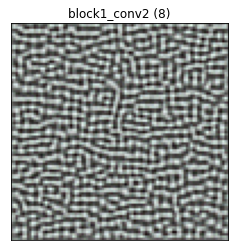

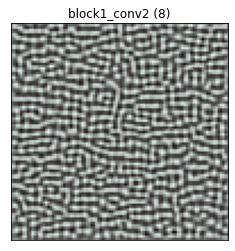

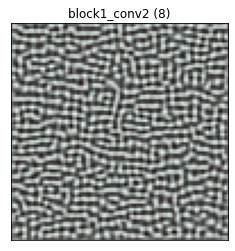

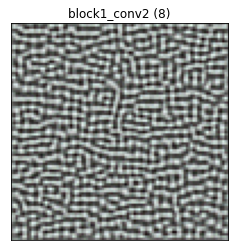

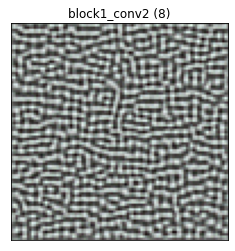

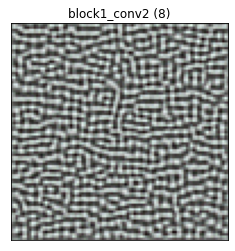

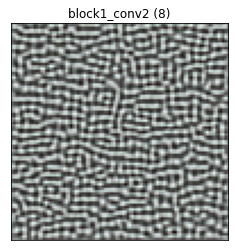

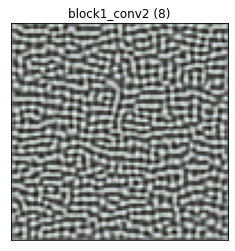

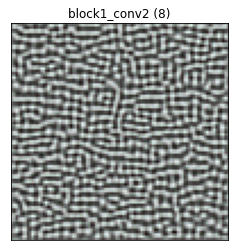

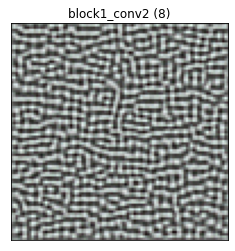

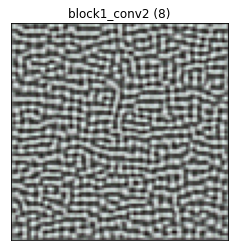

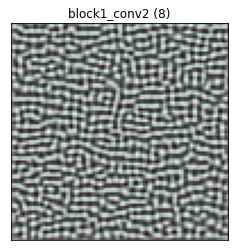

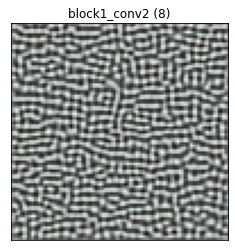

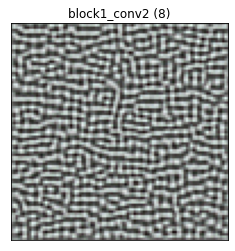

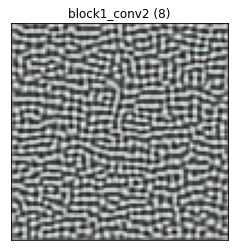

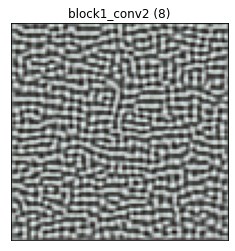

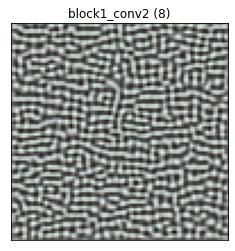

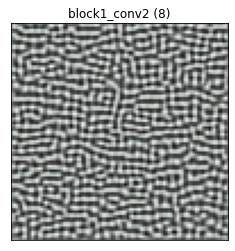

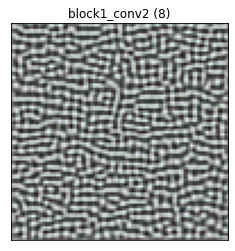

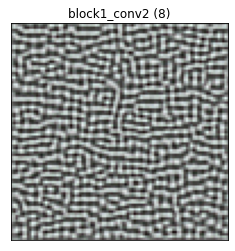

In [ ]:
layer_name= 'block1_conv2' #@param['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


visualize_filter(layer_name)